## Cargamos codigo para tesseract

In [46]:
!pip install matplotlib


  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached contourpy-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (326 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.7 MB/s eta 0:00:002.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 3.5 MB/s eta 0:00:00


In [43]:
import base64
import numpy as np
from PIL import Image, ImageDraw, ImageFont

import easyocr
import pytesseract



def ocultar(datos, tamaño,fuente, altura_imagen=None, anchura_imagen=None):
    """
    Oculta los datos en una imagen en formato de texto.

    Si los datos están cifrados, se codifican en base64 antes de ser escritos. Si no están cifrados,
    se escriben tal cual. El texto se ajusta al tamaño de la imagen, dividiendo las líneas si es necesario.

    Args:
        datos (bytes): Los datos a ocultar en la imagen.
        altura_imagen (int, optional): La altura de la imagen en píxeles. Si es None, se calcula automáticamente.
        anchura_imagen (int, optional): La anchura de la imagen en píxeles. Si es None, se usa un valor por defecto.

    Returns:
        imagen (PIL.Image): La imagen con los datos ocultos como texto.
        str: El formato de la imagen.

    Raises:
        Exception: Si no es posible ajustar los datos en la imagen debido a la falta de espacio.
    """
    # Cargamos la configuración
    tamaño_fuente = tamaño
    anchura_maxima = constantes.conf['Ajustes_ocultador_imagen_text']["anchura_maxima"]
    ruta_fuente = fuente
    fuente = ImageFont.truetype(ruta_fuente, tamaño_fuente)
    
    # Definir la anchura máxima de las líneas
    if anchura_imagen is None:
        anchura_imagen = anchura_maxima
    else:
        anchura_maxima = anchura_imagen

    ancho_maximo_linea = anchura_imagen - 20  # Margen lateral de 10 píxeles a cada lado

    # Lista que contendrá las líneas de texto
    lineas_ajustadas = []

    if datos:
        # Comprobar si la palabra es demasiado larga para caber en una línea
        ancho_datos = fuente.getlength(datos)
        if ancho_datos > ancho_maximo_linea:
            # Dividir los datos en fragmentos que quepan en una línea
            fragmento = ""
            for caracter in datos:
                fragmento_prueba = fragmento + caracter
                ancho_fragmento = fuente.getlength(fragmento_prueba)
                if ancho_fragmento > ancho_maximo_linea:
                    lineas_ajustadas.append(fragmento)
                    fragmento = caracter
                else:
                    fragmento = fragmento_prueba
            if fragmento:
                lineas_ajustadas.append(fragmento)
        else:
            lineas_ajustadas.append(datos)

    # Calcular la altura necesaria si no se ha proporcionado
    altura_linea = tamaño_fuente + 5  # Altura de línea con margen
    altura_necesaria = (altura_linea * len(lineas_ajustadas)) + 20  # Espacio adicional para márgenes

    if altura_imagen is None:
        altura_imagen = altura_necesaria

    # Crear la imagen con las dimensiones calculadas
    imagen = Image.new('RGB', (anchura_imagen, altura_imagen), color='white')
    dibujo = ImageDraw.Draw(imagen)

    # Dibujar el texto en la imagen
    posicion_y = 10  # Margen superior
    for linea in lineas_ajustadas:
        if posicion_y + altura_linea > altura_imagen - 10:  # Detener si excede la altura de la imagen
            raise Exception("No es posible añadir tantos datos a la imagen")
        dibujo.text((10, posicion_y), linea, font=fuente, fill='black')
        posicion_y += altura_linea

    return imagen, constantes.FORMATO_IMAGEN_OCULTACION

def desocultar(imagen):
    return pytesseract.image_to_string(imagen, config='--psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+/=')

import difflib

def similitud_sin_espacios(str1, str2):
    # Eliminar espacios
    s1 = str1.replace(" ", "")
    s2 = str2.replace(" ", "")
    
    # Comparador de secuencias
    secuencia = difflib.SequenceMatcher(None, s1, s2)
    
    # Ratio de similitud (entre 0 y 1) → lo convertimos a porcentaje
    return round(secuencia.ratio() * 100, 2)



## Tessercat fuente, tamaño cualquiera de imagen

11


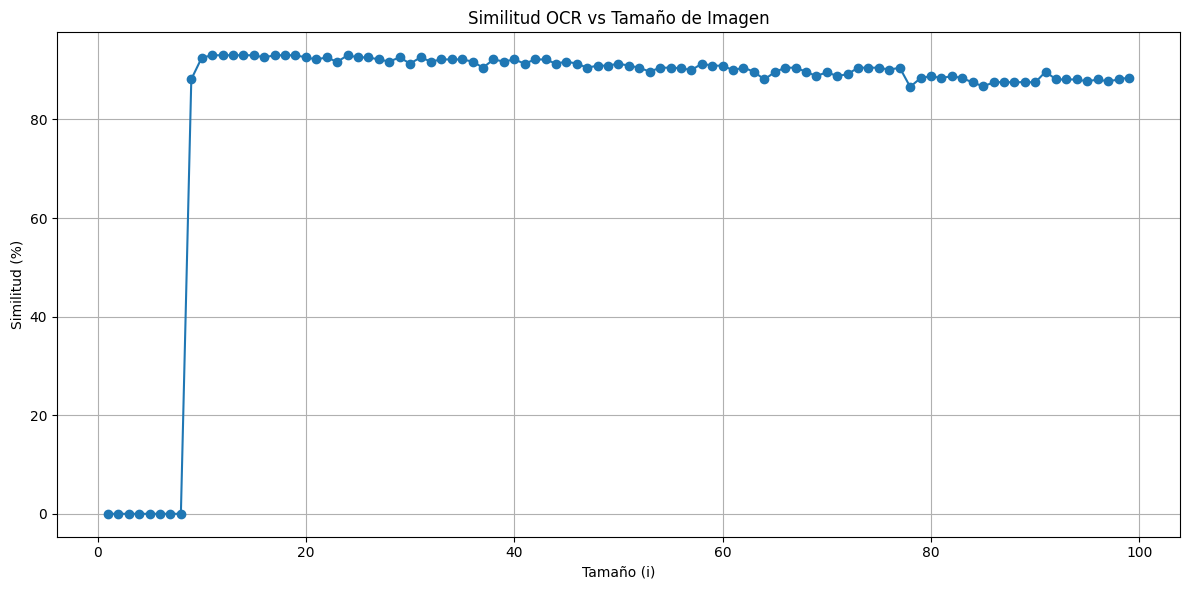

In [55]:
import os
similitudes = []

tope=100
# Crear la ruta completa si no existe
os.makedirs("./experimental/tesseract/tamaño", exist_ok=True)


ruta_dir = "./pitea/fuentes"

secreto= "PITEA Protección de la informacíon mediante técnicas de escenografía acústica Alberto Martin Oruña y Rodrigo Gallego Marin"

for i in range(1,tope) :
      imagen = ocultar(secreto,i,"./pitea/fuentes/ocraregular.ttf")[0]
      imagen.save(f"./experimental/tesseract/tamaño/tamaño_{i}.png")
      texto= desocultar(imagen)
      similitudes.append(similitud_sin_espacios(secreto,texto))


print(similitudes.index(max(similitudes)) +1)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(range(1, tope), similitudes, marker='o')
plt.title("Similitud OCR vs Tamaño de Imagen")
plt.xlabel("Tamaño (i)")
plt.ylabel("Similitud (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


      


      

In [ ]:
   for nombre_archivo in os.listdir(ruta_dir):
      ruta_completa = os.path.join(ruta_dir, nombre_archivo)

In [58]:
import matplotlib.font_manager as fm

# 1. Obtener todas las rutas de fuentes .ttf
rutas_fuentes = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 2. Extraer los nombres legibles de las fuentes
nombres_fuentes = [fm.FontProperties(fname=path).get_name() for path in rutas_fuentes]

# 3. Eliminar duplicados y ordenar
fuentes_unicas = sorted(set(nombres_fuentes))

# 4. Mostrar resultados
print(f"Total de fuentes encontradas: {len(nombres_fuentes)}")
print(f"Total de fuentes únicas: {len(fuentes_unicas)}\n")

for fuente in fuentes_unicas:
    print(fuente)


Total de fuentes encontradas: 200
Total de fuentes únicas: 76

Arial
C059
D050000L
DejaVu Math TeX Gyre
DejaVu Sans
DejaVu Sans Mono
DejaVu Serif
Droid Sans
Droid Sans Fallback
Fantasque Sans Mono
FontAwesome
FreeMono
FreeSans
FreeSerif
Hack Nerd Font
Hack Nerd Font Mono
Hack Nerd Font Propo
Iosevka
Lato
Liberation Mono
Liberation Sans
Liberation Sans Narrow
Liberation Serif
Material
Material-Design-Iconic-Font
MathJax_AMS
MathJax_Caligraphic
MathJax_Fraktur
MathJax_Main
MathJax_Math
MathJax_SansSerif
MathJax_Script
MathJax_Size1
MathJax_Size2
MathJax_Size3
MathJax_Size4
MathJax_Typewriter
MathJax_Vector
MathJax_Vector-Bold
MathJax_WinChrome
MathJax_WinIE6
Nimbus Mono PS
Nimbus Roman
Nimbus Sans
Nimbus Sans Narrow
Noto Mono
Noto Sans
Noto Sans Mono
OCR A Extended
OCR A Std
OCR-A
OCR-B
OpenSymbol
P052
Quicksand
Quicksand Light
Quicksand Medium
Standard Symbols PS
Symbola
URW Bookman
URW Gothic
Z003
cmex10
cmmi10
cmr10
cmsy10
dsrom10
esint10
eufm10
feather
icomoon-feather
msam10
msbm10
r